In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./Datasets/Play_Tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['outlook'] = le.fit_transform(df['outlook'])
df['temp'] = le.fit_transform(df['temp'])
df['humidity'] = le.fit_transform(df['humidity'])
df['windy'] = le.fit_transform(df['windy'])
df['play'] = le.fit_transform(df['play'])

In [3]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


<AxesSubplot:>

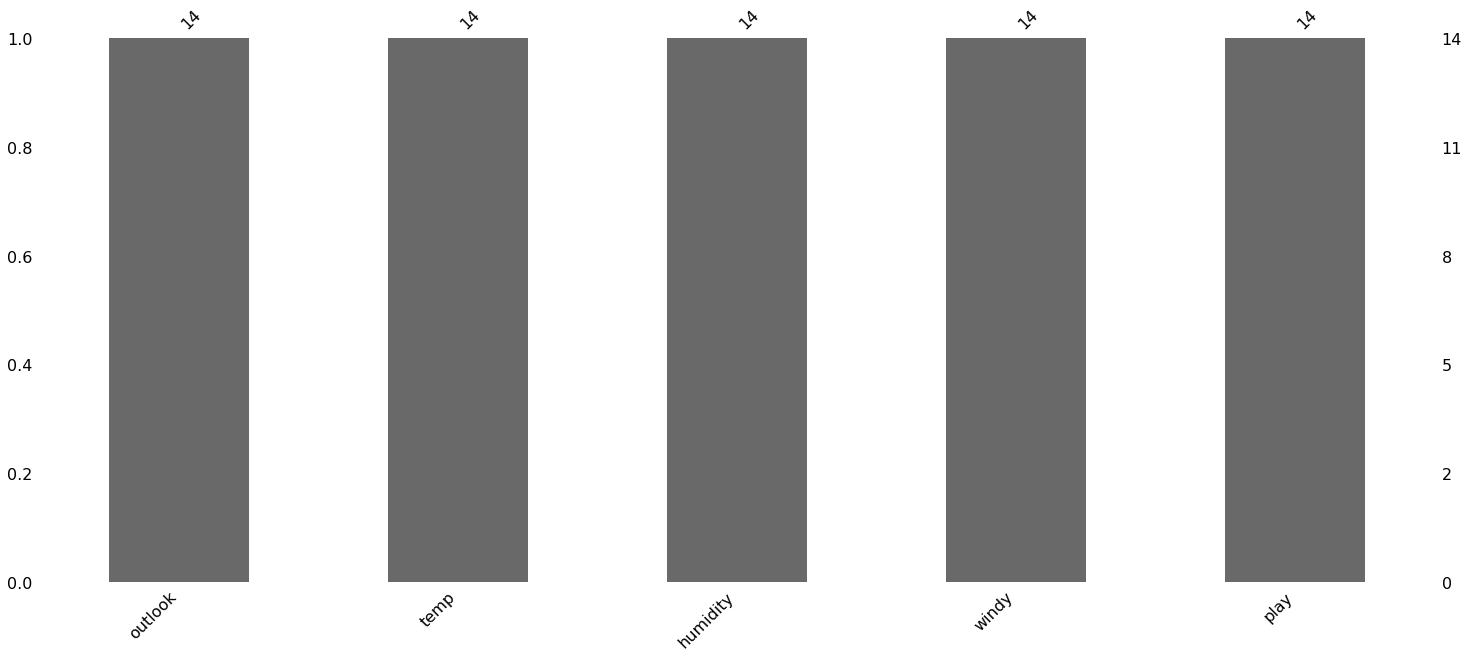

In [4]:
import missingno as msno
msno.bar(df)

NameError: name 'labels' is not defined

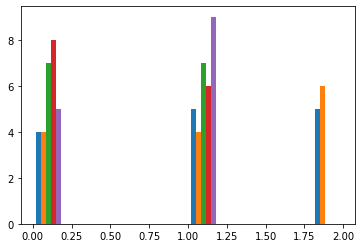

In [5]:
import matplotlib.pyplot as pl
pl.hist(df)
pl.xlabel(labels)
pl.ylabal(values)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['play'],axis=1),df['play'])

In [7]:
from sklearn.tree import DecisionTreeClassifier
info = DecisionTreeClassifier(criterion='entropy',splitter='random')
gini = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10)
info.fit(x_train,y_train)
gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [8]:
info.predict([[0,0,1,1]])

C:\Users\Dell\opencv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [9]:
gini.predict([[0,0,1,1]])

C:\Users\Dell\opencv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.6, 0.9, 'X[2] <= 0.847\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(0.4, 0.7, 'X[0] <= 0.538\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.048\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.4, 0.3, 'X[3] <= 0.845\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

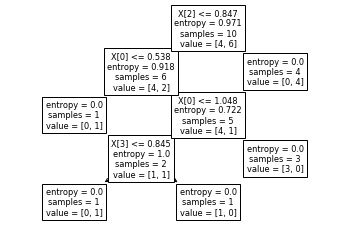

In [10]:
from sklearn.tree import plot_tree
plot_tree(info)

[Text(0.6666666666666666, 0.875, 'X[2] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.5, 0.625, 'X[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

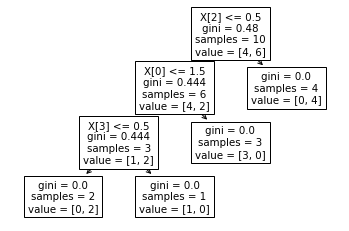

In [11]:
plot_tree(gini)

C:\Users\Dell\opencv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


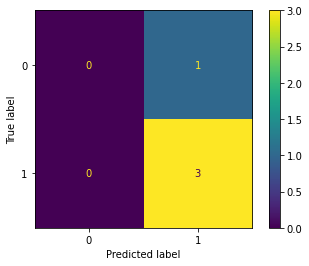

In [12]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(info,x_test,y_test)

C:\Users\Dell\opencv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


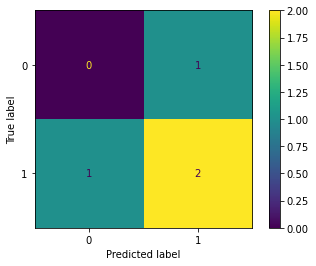

In [13]:
plot_confusion_matrix(gini,x_test,y_test)

In [14]:
pred1=info.predict(x_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Dell\opencv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\opencv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\opencv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
pred2=gini.predict(x_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



<function matplotlib.pyplot.show(close=None, block=None)>

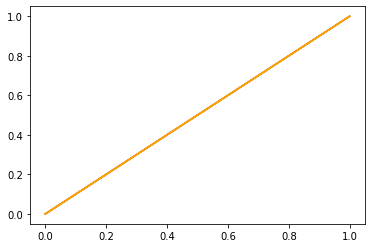

In [17]:
tpr={}
fpr={}
thresh={}
from sklearn.metrics import roc_curve
proba  = info.predict_proba(x_test)
for i in range(2):
    fpr[i],tpr[i],thresh[i]= roc_curve(y_test,proba[:,i],pos_label=i)
import matplotlib.pyplot as plt
plt.plot(fpr[0],tpr[0],linestyle='-',c='green')
plt.plot(fpr[1],tpr[1],linestyle='-',c='red')
plt.plot([[0,0],[1,1]],linestyle='-',c='orange')
plt.show